# 元组、字典、与哈希
<font color= red>列表：有序的、可变的</font>


<font color= red>元组：有序的、不可变的</font>
- 元组的创建
- 元组的查询（与列表一致）
- 元组的的效率性——编译时运行、缓存池


<font color= red>字典：无序的、可变的</font>——由键值对组成
- 字典的创建
- 字典的效率性——哈希表


<font color= red>集合：无序的、不可变的</font>


<font color= red>哈希表：字典的底层是借助哈希表实现的。</font>

# 一、元组

- 元组是一个<font color= red>有序的不可改变</font>的 Python 序列对象，可以理解为只支持查询，不支持元素添加、修改、删除等操作的列表。
- 元组一经创建，元组中的对象就不能修改了。但如果元组中的某个对象是可变的，则可以在原位进行修改
- 元组存在的最大一个特点就是，它可以作为字典的 key、以及可以作为集合的元素（因为二者均要求不可变）。

In [1]:
#创建元组的最简单方式，是用逗号分隔一列值
a = 1, 2 ,3, 4            # (1, 2, 3, 4)

#当用复杂的表达式定义元组，最好将值放在圆括号内
b = (5, 6), (7, 8)        # ((5, 6), (7, 8))

#使用tuple函数可以将任意序列（或迭代器）转换成元祖
c = tuple([9, 10, 11])   #将列表转化为元祖           # (9, 10, 11)
d = tuple("string")      #将字符串转化为元祖         # ('s', 't', 'r', 'i', 'n', 'g')

In [2]:
#元组一经创建，元组中的对象就不能修改了
a[0] = 10

TypeError: 'tuple' object does not support item assignment

In [3]:
#如果元组中的某个对象是可变的，则可以在原位进行修改
tup = [0,1],2          # ([0, 1], 2)
tup[0].append(3)
print(tup)

([0, 1, 3], 2)


In [4]:
#使用方括号访问元素，序列从0开始
a[0]                     # 1

#可以用加法运算符将数组串联
a + b                    # (1, 2, 3, 4, (5, 6), (7, 8))

#元组乘一个整数，会将几个元组复制串联起来
a * 4             # (1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4)

(1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4)

In [5]:
#拆分元组
m, n, p, q = a   # m = 1, n = 2 ...
x, y, = b        # x = (5, 6), y = (7, 8)
(g, h), i = b    # g = 5, h = 6, i = (7, 8)

### 元组的效率

- 元组的使用广泛，为了运行效率，解释器会<font color= red>在编译时就为其分配好内存</font>。当然其前提是，元组内部的元素都是静态常量，否则也只能留到运行时。至于列表、集合、字典，不管内部元素如何，都会在运行时才创建。


- 因为涉及到大量的创建和销毁，为了加快内存分配，<font color= red>元组可以将资源缓存起来</font>。
元组的缓存池大小是 20，列表的缓存池大小是 80。但是这里的20和80还稍稍有些不同，80指的是列表缓存池的大小，除此之外没有别的含义；而20除了表示元组缓存池的大小之外，它还表示<font color= red>只有当元组的长度小于20，回收时才会被放入缓存池</font>。
因此，元组的缓存池是一个数组，并且索引为n的位置回收的是长度也为n的元组(指针)，并且n小于20。
具有相同长度的元组怎么办呢？——将它们以链表的形式串起来即可，每条链表的长度小于2000，也就是<font color= red>具有相同长度的元组最多回收大概2000个</font>。


- 此外元组和列表还有一个区别，那就是列表在被回收时，它的指针数组会被释放；但<font color= red>元组在被回收时，底层的指针数组会保留</font>，并且还巧妙地通过索引来记录回收的元组的大小规格。元组的这项技术也被称为<font color= red>静态资源缓存</font>，因为元组在执行析构函数时，不仅对象本身没有被回收，连底层的指针数组也被缓存起来了。那么当再次分配时，速度就会快一些。

以链表形式串起来的缓存池如下图所示：
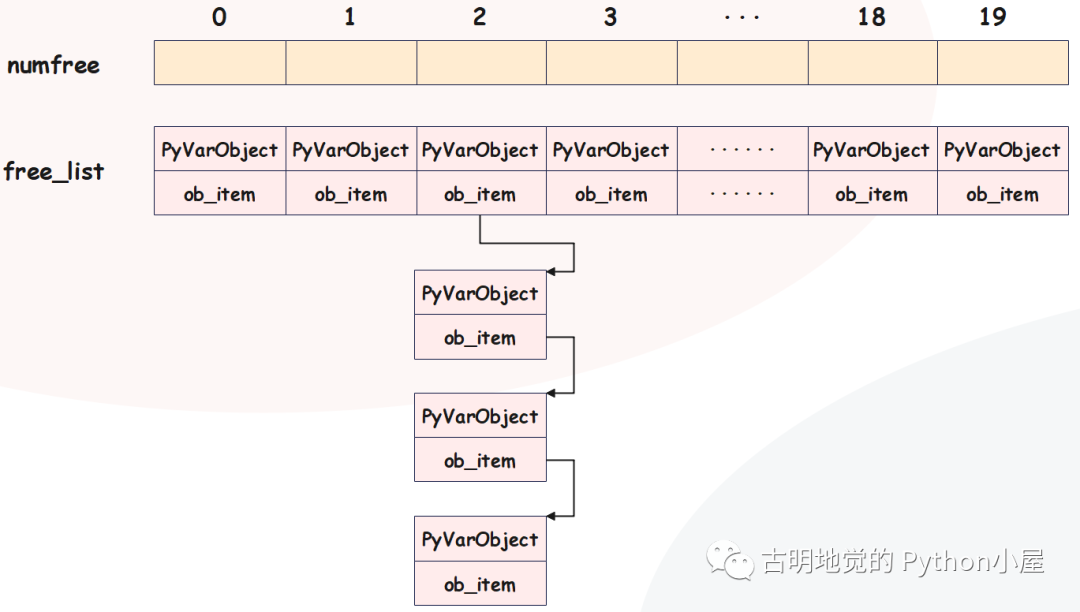

# 二、字典

字典和列表类似，也是可变序列，只是与列表不同，它是<font color= red>无序的可变序列</font>，保存内容以<font color= red>“键值对”</font>的形式存放。
### 字典的创建

In [6]:
# 创建一个字典
d = {"a": 1, "b": 2}
print(d)  # {'a': 1, 'b': 2}

# 或者我们还可以通过dict, 传入关键字参数即可
d = dict(a=1, b=2, c=3, d=4)
print(d)  # {'a': 1, 'b': 2, 'c': 3, 'd': 4}

# 当然dict里面还可以接收位置参数, 但是最多接收一个
d1 = dict({"a": 1, "b": 2}, c=3, d=4)
d2 = dict([("a", 1), ("b", 2)], c=3, d=4)
print(d1)  # {'a': 1, 'b': 2, 'c': 3, 'd': 4}
print(d2)  # {'a': 1, 'b': 2, 'c': 3, 'd': 4}

{'a': 1, 'b': 2}
{'a': 1, 'b': 2, 'c': 3, 'd': 4}
{'a': 1, 'b': 2, 'c': 3, 'd': 4}
{'a': 1, 'b': 2, 'c': 3, 'd': 4}


### 字典的效率
key --- 函数运算 --- 某个值 --- 索引 --- value
- 这个 “函数” 就是 “哈希函数” 
- 这个 “值” 就是 “哈希值”
- key-value的存储于 “哈希表” 中


- 在查询过程中<font color= red>字典的快不会受到数据量的影响</font>，从含有一万个键值对的字典中查找，和从含有一千万个键值对的字典中查找，两者花费的时间几乎是没有区别的。这是由于字典的底层是借助哈希表实现的。
- 为了换取在时间上的“快”，字典需要为key设置额外的存储空间。因此相当于<font color= red>用空间的效率来换取时间的效率</font>
-为了优化内存，减少在空间上的效率损失，python将哈希表分成两个数组来存储，后面会进一步展开。

In [7]:
import time
import numpy as np

def test(count: int, value: int):
    """
    :param count: 循环次数
    :param value: 查询的元素
    :return:
    """
    # 生成一个存有一千个随机数的列表
    lst = list(np.random.randint(0, 2 ** 30, size=1000))
    # 根据这个列表构造出含有一千个键值对的字典
    d = dict.fromkeys(lst)

    # 查询元素value是否在列表中, 循环count次, 并统计时间
    t1 = time.perf_counter()
    for _ in range(count):
        value in lst
    t2 = time.perf_counter()
    print("列表查询耗时:", round(t2 - t1, 3))

    # 查询元素value是否在字典中, 循环count次, 并统计时间
    t1 = time.perf_counter()
    for _ in range(count):
        value in d
    t2 = time.perf_counter()
    print("字典查询耗时:", round(t2 - t1, 3))

test(10 ** 4, 22333)

列表查询耗时: 1.091
字典查询耗时: 0.0


### 哈希表的原理
<font color= red>哈希表的原理是将key通过哈希函数进行运算，得到一个哈希值，再将这个哈希值映射成索引。虽然数组在遍历的时候是个时间复杂度为O(n)的操作，但是通过索引定位元素则是一个时间复杂度为O(1)的操作，不管数组有多长，通过索引总是能瞬间定位到指定元素。</font>
### 哈希值与可哈希对象
<font color= red>Python内置函数hash可以计算对象的哈希值，哈希表依赖于哈希值</font>。而根据哈希表的性质，我们知道<font color= red>可哈希(hashable)对象</font>满足以下两个条件，否则它无法容纳在哈希表中。
- <font color= red>（不可变）其哈希值在对象的整个生命周期内不可以改变</font>
- <font color= red>（唯一）可比较，如果两个对象相等，那么它们的哈希值一定相同</font>
只有可哈希对象才可以作为哈希表的键(key)。因此像字典、集合等底层由哈希表实现的数据结构，其元素必须是可哈希对象。
<font color= red>Python内置的不可变对象都是可哈希对象</font>，比如：整数、浮点数、字符串、只包含不可变对象的元组等等；而像可变对象，比如列表、字典等等便不可作为哈希表的键。

### 哈希函数
理想的哈希函数必须保证哈希值尽量均匀地分布于整个哈希空间中，越是相近的值，其哈希值差别应该越大。还是那句话，哈希函数对哈希表的好坏起着至关重要的作用。这涉及到“索引冲突”的问题，后面会展开。

通过哈希表设置元素过程如下图所示：
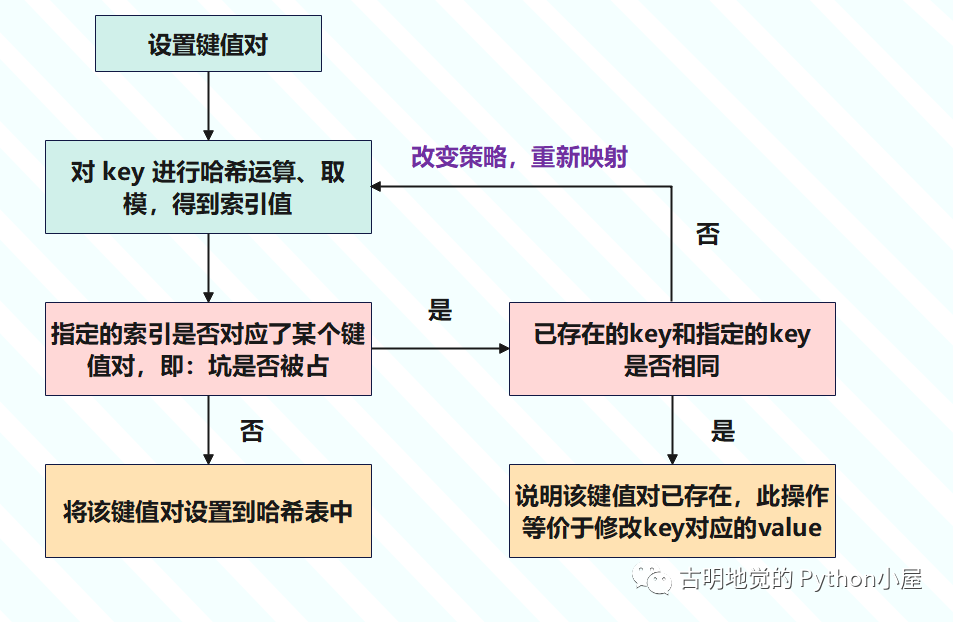



在哈希表中获取元素过程如下图所示：
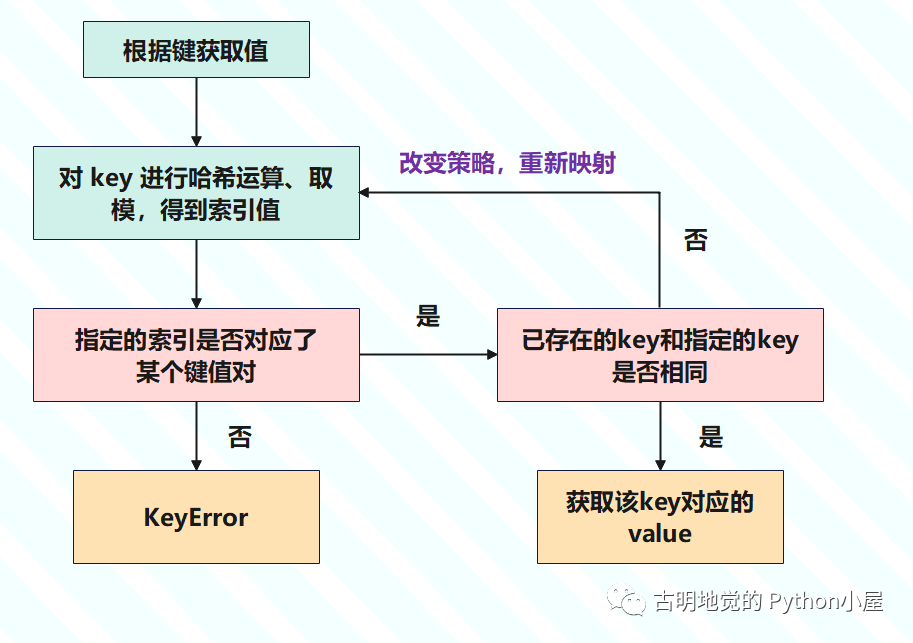


### 索引冲突
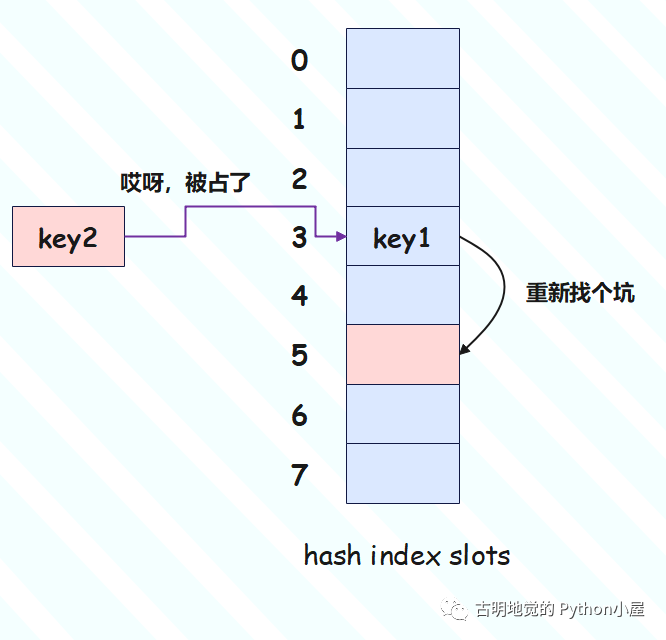
与哈希值空间相比，哈希表的槽位是非常有限的。如果不同的对象在经过映射之后，生成的索引相同，或者说它们被映射到了同一个槽，那么便发生了索引冲突。

- 不同的对象，计算出的哈希值有可能相同

- 即使哈希值不同，生成的索引也可能相同

<font color= red>解决索引冲突的常用方法</font>有两种：

- 分离链接法(separate chaining)：为每个哈希槽维护一个链表，所有哈希到同一槽位的键保存到对应的链表中.

- <font color= red>开放寻址法</font>(open addressing，Python采用)：依旧是将key映射成索引，并存于哈希索引数组的槽中，若发现槽被占了，那么就尝试另一个。一般而言，如果是第i次尝试，那么会<font color= red>在首槽的基础上加上一个偏移量 d(i)</font>。比如映射之后的索引是 n，那么首槽就是 n，然而索引为 n 的槽被占了，于是重新映射，而重新映射之后的索引就是 n+d(i)。

其中Python采用的便是开放寻址法，下面来看看这两种做法之间的区别。

探测方式因函数 d(i) 而异，而常见的探测函数也有两种：

- <font color= red>线性探测</font>(linear probing)：例如 d(i)=2*i+1

- <font color= red>平方探测</font>(quadratic probing)：例如 d(i)=i^2

线性探测和平方探测都比较简单，但从效果上来看，平方探测似乎更胜一筹。<font color= red>如果哈希表存在局部热点，线性探测很难快速跳过热点区域，而平方探测则可以解决这一点</font>。


线性探测和平方探测的缺点在于其<font color= red>固定的探测序列</font>，加大了冲突的概率。所以Python对此进行了优化，探测函数会参考对象哈希值，生成不同的探测序列，进一步降低索引冲突的可能性：
这种做法被称为<font color= red>迭代探测</font>，也属于开放寻址法的一种。当出现索引冲突时，Python并不是简简单单地加上一个偏移量，而是使用专门设计的探测函数进行二次探查，也就是之前说的改变规则、重新映射，然后在函数内部会参考对象的哈希值来计算出一个新的索引。



平方探测示意图如下：
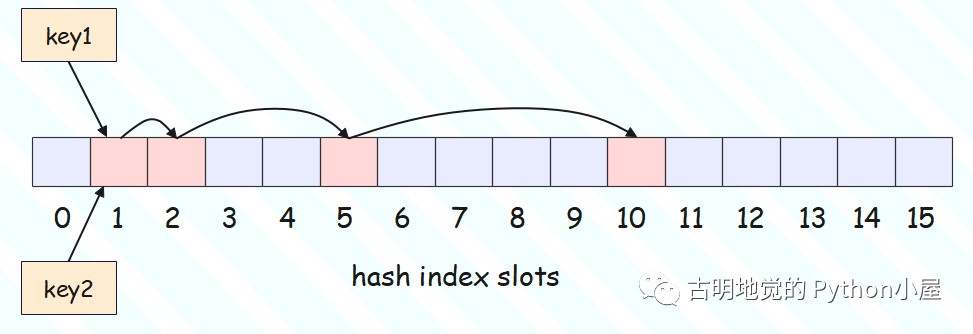


迭代探测示意图如下：
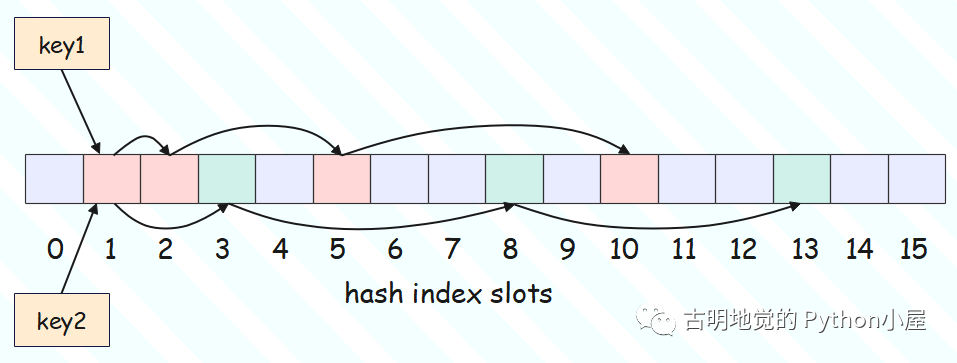



### 在哈希表中删除元素
通过开放寻址法，当发生冲突时，在探测函数内部会参考哈希值以及冲突的索引，计算下一个候选位置，如果可用就设置进去。如果不可用，会继续重复此过程，直到找到一个可用的位置。通过多次探测，可以从一个位置到达多个位置，我们认为这些位置就形成了一个<font color= red>冲突探测链(探测序列)</font>。比如当我们插入一个key="satori"的键值对时，在位置a发现不行，又走位置b，发现也被人占了，于是到达位置c，而位置c没有key，于是就存在了这里。那么经过以上流程，<font color= red>a -> b -> c便形成了一条冲突探测链</font>，同理我们查找的时候也会按照这个顺序进行查找。

    
当我们直接获取d["satori"]，肯定会先到达位置a，发现存在entry、但是key不是字符串satori，于是重新映射；然后走到位置b，发现还不对，再走到位置c，发现key是satori，于是就把值取出来了。显然这符合我们的预期，但是，我要说但是了。
如果我们把位置b上的entry删掉呢？那么老规矩，映射成索引，先走到位置a，但是发现坑被占；于是又走到位置b，结果发现居然没有entry，那么直接就报出了一个KeyError。
所以继续寻找的前提是，这个地方要存储了entry，并且存在的entry -> me_key和指定的key不相同；但如果没有的话，就说明根本没有这个key，直接KeyError。
然而satori这个key确实是存在的，因此这种情况我们称之为<font color= red>探测链断裂</font>。本来应该走到位置c的，但是由于位置b没有元素，导致探测函数在位置b就停止了。
因此我们发现，当一个元素只要位于任何一条探测链当中，在删除元素时都不能真正意义上的删除，而是一种伪删除操作。
而当一个PyDictObject对象发生变化时，其中的entry会在三种不同的状态之间进行切换：unused态、active态、dummy态。


- unused态：当一个entry的me_key和me_value都是NULL的时候，entry处于unused态，每一个entry在初始化的时候都会处于这个状态。

- active态：当entry存储了key时，那么此时entry便从unused态变成了active态。

- dummy态：<font color= red>当某个key被删除时，它所在的entry便从active态变成dummy态（伪删除）</font>。


当Python沿着某条探测链搜索时，如果发现一个entry处于dummy态，就会明白虽然当前的entry是无效的，但是后面的entry可能是有效的，所以不会报错，而是会继续搜索，这样就保证了探测链的连续性。
至于报错，是在找到了unused态的entry时才会报错，因为这里确实一直都没有存储过key。但索引又是当前这个位置，因此指定的key就真的不存在哈希表中，此时才会报错。

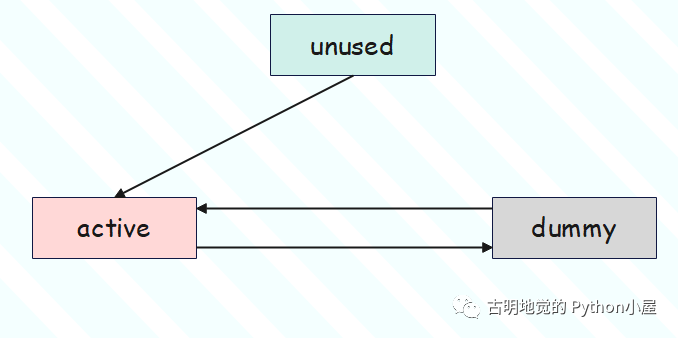    

unused态只能转换为active态；active态只能转换为dummy态；dummy态只能转化为active态。

- unused态转为active态：新来一个key,当entry被使用时，它便由unused态转为active态，此时me_key由NULL变成非NULL；

- active态转换为dummy态：key被删除；

- dummy态转为active态：新来了一个key，在沿着冲突探测链继续查找时要是遇到了处于dummy态的entry，那么该entry就会从dummy态变成active态。
另外当哈希表满了，会申请新的存储单元，然后将所有的active态的entry都搬过去，而处于dummy态的entry则直接丢弃。

### 哈希攻击



Python在3.3以前，哈希算法只根据对象本身计算哈希值。因此只要解释器版本相同，对象哈希值也肯定相同。
如果一些别有用心的人<font color= red>构造出大量哈希值相同的key</font>，并提交给服务器，会发生什么事情呢？例如，向一台使用Python2编写的web服务post一个json数据，数据包含大量哈希值都相同的key。这意味着<font color= red>哈希表将频繁发生索引冲突，性能也会由O(1)急剧下降为O(N)</font>，这便是哈希攻击。问题虽然很严重，但是好在应对方法比较简单，直接往对象身上撒把盐(salt)即可。具体做法如下：



- Python解释器进程启动后，<font color= red>产生一个随机数</font>作为盐；

- <font color= red>哈希函数同时参考对象本身以及随机数计算哈希值</font>；



这样一来，攻击者由于无法获取解释器内部的随机数，也就无法构造出哈希值相同的对象了。Python自3.3以后，哈希函数均采用加盐模式，杜绝了哈希攻击的可能性。Python哈希算法在Python/pyhash.c源文件中实现，有兴趣可以自己去了解一下。


## 字典的底层实现
字典对应的结构体是PyDictObject，其包含字段：

- PyObject_HEAD：定长对象的头部信息
- ma_used：键值对的个数，它充当了ob_size
- ma_version_tag：字典的版本号 （可忽略）
- <font color= red>ma_keys：指向PyDictKeysObject的指针</font>
- ma_values：指向PyObject * 类型的指针数组的二级指针

结合表：键和值就存在一起（均由 ma_keys 维护，ma_values 为NULL）。


分离表：键和值就存在不同的地方（分别存至 ma_keys 和 ma_values）。

- 分离表是在PEP-0412中被引入的，主要是为了提高内存使用率，也就是<font color= red>让不同的字典共享相同的一组key</font>。比如我们<font color= red>自定义类的实例对象</font>，它们默认都有自己的属性字典，如果对某个类多次实例化，那么改成分离表会更有效率。因为它们的属性名称是相同的，完全可以共享同一组key；如果是结合表，那么每个实例的属性字典都要保存相同的key，这显然是一种浪费。


- <font color= red>我们平时自己创建的字典，使用的都是结合表</font>，因此我们的重点也将会放在结合表身上。

结合表的键值都由ma_keys维护，它是一个指向PyDictKeysObject的指针，PyDictKeysObject对象包含字段如下：



- dk_refcnt：key的引用计数，也就是key被多少个字典所使用。如果是结合表，那么该成员始终是1，因为结合表独占一组key；如果是分离表，那么该成员大于等于1，因为分离表可以共享一组key；

- dk_size：哈希表大小，并且大小是2的n次方，这样可将模运算优化成按位与运算；

- dk_lookup：<font color= red>哈希函数</font>，用于计算key的哈希值，然后映射成索引。一个好的哈希函数应该能尽量少的避免冲突，并且哈希函数对哈希表的性能起着至关重要的作用。所以底层的哈希函数有很多种，会根据对象的种类选择最合适的一个。

- dk_usable：键值对数组的长度，关于什么是键值对数组下面会解释。

- dk_nentries：哈希表中已使用的entry数量，这个entry你可以理解为键值对，一个entry就是一个键值对。

- dk_indices：<font color= red>哈希索引数组</font>，后面会解释。

- dk_entries：<font color= red>键值对数组</font>。其类型是一个<font color= red>PyDictKeyEntry</font>类型的数组，用于存储键值对、也就是上面说的entry。所以这也说明了，Python的一个键值对，在底层就是一个PyDictKeyEntry结构体实例。

PyDictKeyEntry对象包含字段：


- me_key：指向键；
- me_value：指向值；
- me_hash：表示键对应的哈希值，避免重复计算。

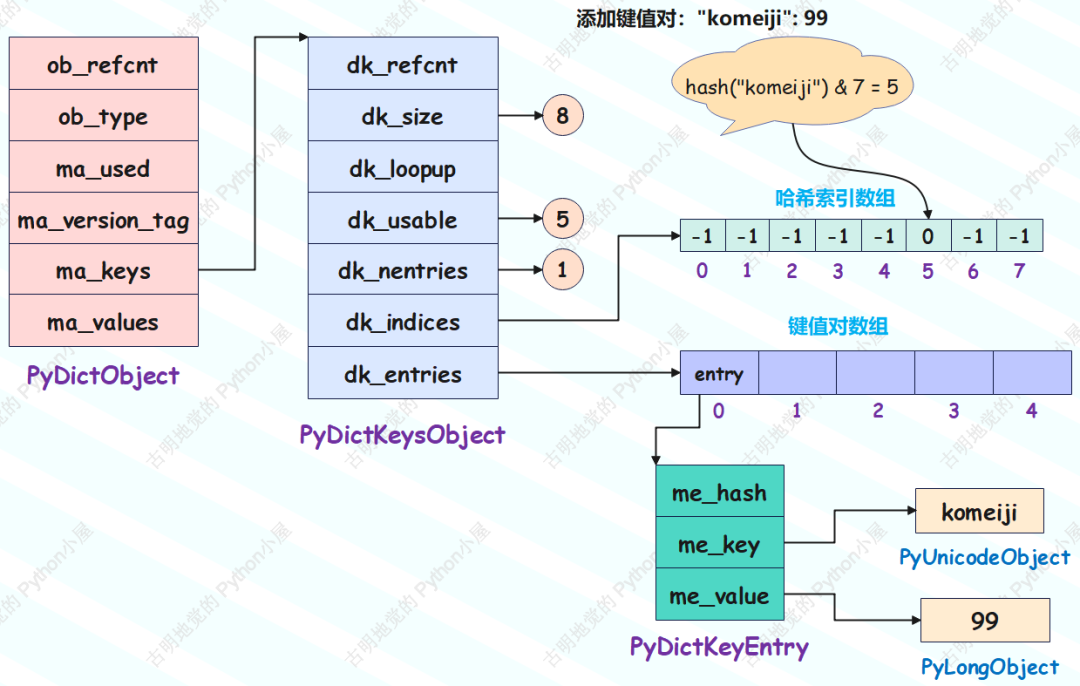

### 插入键值对的底层实现
比如我们创建一个空字典，注意：虽然字典是空的，但是容量已经有了，然后往里面<font color= red>插入键值对"komeiji":99</font>的时候，Python会执行以下步骤：



- 将键值对保存在 dk_entries 中，由于初始字典是空的，所以会保存在 dk_entries 数组中索引为0的位置。

> 字典的遍历顺序: 虽然映射之后的索引是随机的，但是<font color= red>键值对本身始终是按照先来后到的顺序被添加进键值对数组中</font>，因此Python从3.6开始，<font color= red>字典的遍历是有序的</font>。字典在for循环时，会直接遍历键值对数组，所以遍历的结果是有序的。但即便如此，我们也不应该依赖此特性。

- 通过哈希函数计算出 "komeiji" 的哈希值，然后将哈希值映射成“哈希索引数组”的索引，假设是5。

- 将 "键值对" 在 "键值对数组"中的索引0，保存在“哈希索引数组”中索引为5的槽里面。


### 查找键值对的底层实现
然后当我们在<font color= red>查找键 "komeiji" 对应的值</font>的时候，便可瞬间定位。过程如下：



- 通过哈希函数计算出 "komeiji" 的哈希值，然后映射成“哈希索引数组”的索引。

- 找到“哈希索引数组”中索引为5的槽，得到其保存的0，这里的0对应“键值对数组”的索引。

- 找到“键值对数组”中索引为0的位置存储的 entry，先比较key、也就是 entry -> me_key 是否一致，不一致则重新映射。如果一致，则取出 me_value，然后返回。

### 哈希表分成两个数组实现的原因——内存优化

- 早期的Python中，一个键值对数组既用来存储，又用来充当索引，相当于<font color= red>把哈希索引数组和键值对数组合在一块</font>，无需分成两个步骤，而且这种方式也似乎更简单、更直观。但是它有一个弊端，就是<font color= red>太耗费内存</font>了。


- 哈希表越密集，索引冲突则越频繁，性能也就越差。因此，哈希表必须是一种稀疏的表结构，越稀疏则性能越好。但由于内存开销的制约，哈希表不可能无限地稀疏，所以需要在时间和空间上进行权衡。
实践经验表明，<font color= red>一个 1/2 到 2/3 满的哈希表，性能较为理想，能以相对合理的内存换取相对高效的执行性能</font>。为保证哈希表的稀疏程度，进而控制索引冲突的频率，<font color= red>Python通过宏USABLE_FRACTION将哈希表的元素控制在容量的2/3以内</font>。宏USABLE_FRACTION会根据哈希表的长度，计算哈希表可存储的元素个数，也就是键值对数组的长度。以长度为8的哈希表为例，最多可以保存5个键值对，超出则需要扩容。


因此哈希表必须保持一定程度的稀疏，最多只有<font color= red>2/3</font>满，这意味着至少要浪费1/3的空间。


- 所以Python为了尽量节省内存，将<font color= red>键值对数组只用来存储，对key进行映射得到的索引由另一个数组——“哈希索引数组”来体现</font>。假设映射的索引是4，那么就去找哈希索引数组中索引为4的槽，该槽存储的便是键值对在键值对数组中的索引。



- 之所以这么设计，是因为<font color= red>键值对数组里面一个元素要占用24字节，而哈希索引数组在容量不超过255的时候，里面一个元素只占一个字节；容量不超过65535的时候，里面一个元素只占两个字节</font>，其它以此类推。所以哈希索引数组里面的元素大小比键值对数组要小很多，将哈希表分成两个数组(避免键值对数组的浪费)来实现会更加的节省内存。

### 容量策略与内存占用
- 字典和列表一样有着<font color= red>预分配机制</font>。因为可以扩容，那么为了避免频繁申请内存，所以在扩容的时候会将容量申请的比键值对个数要多一些。哈希表规模一定是2的 n 次方，也就是说 <font color= red>Python 采用翻倍扩容的策略</font>。例如，长度为8的哈希表扩容后，长度会变为16。另外，这里的哈希表长度和哈希索引数组的长度是等价的。


- 由宏定义可以得知，一个字典的最小容量是8，或者说内部哈希索引数组的长度最小是8。


- 使用花括号{}创建的空字典占用的内存是48字节，使用dict()函数创建的空字典占用内存216字节。

### *空字典占用的内存大小
Python为空字典分配了一个长度为8的哈希表，因而也要占用相当多的内存，主要由以下几个部分组成：


- PyDictObject中有6个成员，一个8字节，加起来共48字节；

- PyDictKeysObject中有7个成员，除了两个数组之外，剩余的每个成员也是一个8字节，所以加起来40字节；

- 而剩余的两个数组，一个是char类型的数组dk_indices，里面1个元素占1字节；还有一个PyDictKeyEntry类型的数组dk_entries，里面一个元素占24字节，因为PyDictKeyEntry里面有三个成员，一个8字节。但是注意：字典容量为8，说明哈希索引数组dk_indices长度为8，但是键值对数组dk_entries长度是5，至于原因我们上面分析的很透彻了。因此这两个数组加起来总共是 8 + 24 * 5 = 128字节。

In [8]:
# 一个空字典占用的内存是216字节 (48 + 40 + 128)
d = dict()
d.__sizeof__()

216

In [9]:
# 通过Python/C API创建的空字典, 初始容量就是0，此时只有48字节，因为ma_keys此时是NULL
e = {}
e.__sizeof__()

48